<a href="https://colab.research.google.com/github/kv057/Database-Project-/blob/main/Copy_of_dbmsprojectfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


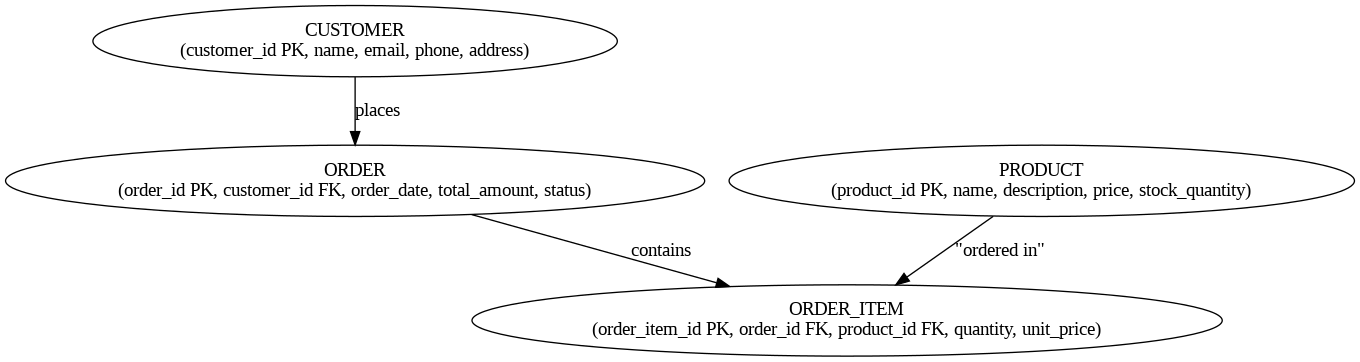

In [ ]:
# Install Graphviz if not already installed
!apt-get install graphviz -y
!pip install graphviz

import graphviz

# Define ER diagram
er = graphviz.Digraph('ER_Diagram', format='png')

# Entities
er.node('CUSTOMER', 'CUSTOMER\n(customer_id PK, name, email, phone, address)')
er.node('PRODUCT', 'PRODUCT\n(product_id PK, name, description, price, stock_quantity)')
er.node('ORDER', 'ORDER\n(order_id PK, customer_id FK, order_date, total_amount, status)')
er.node('ORDER_ITEM', 'ORDER_ITEM\n(order_item_id PK, order_id FK, product_id FK, quantity, unit_price)')

# Relationships
er.edge('CUSTOMER', 'ORDER', label='places')
er.edge('ORDER', 'ORDER_ITEM', label='contains')
er.edge('PRODUCT', 'ORDER_ITEM', label='"ordered in"')

# Render the diagram
er.render('er_diagram', format='png', cleanup=False)
from IPython.display import display, Image
display(Image('er_diagram.png'))


In [ ]:
import pandas as pd

# Define tables as dataframes
customer_table = pd.DataFrame({
    "Column Name": ["customer_id", "name", "email", "phone", "address"],
    "Data Type": ["INT", "STRING", "STRING", "STRING", "STRING"],
    "Constraints": ["PRIMARY KEY", "NOT NULL", "UNIQUE, NOT NULL", "NOT NULL", "NOT NULL"]
})

product_table = pd.DataFrame({
    "Column Name": ["product_id", "name", "description", "price", "stock_quantity"],
    "Data Type": ["INT", "STRING", "STRING", "DECIMAL", "INT"],
    "Constraints": ["PRIMARY KEY", "NOT NULL", "NOT NULL", "NOT NULL", "NOT NULL"]
})

order_table = pd.DataFrame({
    "Column Name": ["order_id", "customer_id", "order_date", "total_amount", "status"],
    "Data Type": ["INT", "INT", "DATE", "DECIMAL", "STRING"],
    "Constraints": ["PRIMARY KEY", "FOREIGN KEY (CUSTOMER)", "NOT NULL", "NOT NULL", "NOT NULL"]
})

order_item_table = pd.DataFrame({
    "Column Name": ["order_item_id", "order_id", "product_id", "quantity", "unit_price"],
    "Data Type": ["INT", "INT", "INT", "INT", "DECIMAL"],
    "Constraints": ["PRIMARY KEY", "FOREIGN KEY (ORDER)", "FOREIGN KEY (PRODUCT)", "NOT NULL", "NOT NULL"]
})

# Display tables
print("CUSTOMER Table")
display(customer_table)

print("PRODUCT Table")
display(product_table)

print("ORDER Table")
display(order_table)

print("ORDER_ITEM Table")
display(order_item_table)


CUSTOMER Table


,Column Name,Data Type,Constraints
0,customer_id,INT,PRIMARY KEY
1,name,STRING,NOT NULL
2,email,STRING,"UNIQUE, NOT NULL"
3,phone,STRING,NOT NULL
4,address,STRING,NOT NULL


PRODUCT Table


,Column Name,Data Type,Constraints
0,product_id,INT,PRIMARY KEY
1,name,STRING,NOT NULL
2,description,STRING,NOT NULL
3,price,DECIMAL,NOT NULL
4,stock_quantity,INT,NOT NULL


ORDER Table


,Column Name,Data Type,Constraints
0,order_id,INT,PRIMARY KEY
1,customer_id,INT,FOREIGN KEY (CUSTOMER)
2,order_date,DATE,NOT NULL
3,total_amount,DECIMAL,NOT NULL
4,status,STRING,NOT NULL


ORDER_ITEM Table


,Column Name,Data Type,Constraints
0,order_item_id,INT,PRIMARY KEY
1,order_id,INT,FOREIGN KEY (ORDER)
2,product_id,INT,FOREIGN KEY (PRODUCT)
3,quantity,INT,NOT NULL
4,unit_price,DECIMAL,NOT NULL


In [ ]:
import sqlite3

# Connect to SQLite (or create a new database file)
conn = sqlite3.connect(":memory:")  # Use ":memory:" for an in-memory database or "database.db" for a file

# Create a cursor object
cursor = conn.cursor()

# SQL script from your file
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Inserting sample data into 'users'
INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

-- Creating the 'patients' table
CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

-- Inserting sample data into 'patients'
INSERT INTO patients (id, user_id, age, gender) VALUES
(1, 1, 45, 'Male'),
(2, 2, 38, 'Female');

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Inserting sample data into 'meals'
INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
(1, 'Grilled Chicken Salad', 400, 20, 35, 10),
(2, 'Oatmeal with Nuts', 350, 40, 10, 15);

-- Creating the 'meal_plans' table
CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);

-- Inserting sample data into 'meal_plans'
INSERT INTO meal_plans (id, patient_id, meal_id, date) VALUES
(1, 1, 1, '2025-02-05'),
(2, 2, 2, '2025-02-06');
"""

# Execute the script
cursor.executescript(sql_script)

# Commit changes and close the connection
conn.commit()
conn.close()

print("Database initialized successfully!")

Database initialized successfully!


Basic Retrieval Queries (5 pts)

In [ ]:
import sqlite3
import pandas as pd

# Connect to an in-memory SQLite database
conn = sqlite3.connect(":memory:")  # Use "diabetes_meal_planner.db" for a file-based DB
cursor = conn.cursor()

# SQL script to create tables and insert data
sql_script = """
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

INSERT INTO patients (id, user_id, age, gender) VALUES
(1, 1, 45, 'Male'),
(2, 2, 38, 'Female');

CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
(1, 'Grilled Chicken Salad', 400, 20, 35, 10),
(2, 'Oatmeal with Nuts', 350, 40, 10, 15);

CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);

INSERT INTO meal_plans (id, patient_id, meal_id, date) VALUES
(1, 1, 1, '2025-02-05'),
(2, 2, 2, '2025-02-06');
"""

# Execute the SQL script
cursor.executescript(sql_script)

# Verify table creation by fetching data
for table in ["users", "patients", "meals", "meal_plans"]:
    df = pd.read_sql_query(f"SELECT * FROM {table};", conn)
    print(f"\nTable: {table}")
    print(df)

# Close the connection
conn.close()



Table: users
   id        name                   email         password
0   1    John Doe    john.doe@example.com  securepassword1
1   2  Jane Smith  jane.smith@example.com  securepassword2

Table: patients
   id  user_id  age  gender
0   1        1   45    Male
1   2        2   38  Female

Table: meals
   id                   name  calories  carbohydrates  proteins  fats
0   1  Grilled Chicken Salad       400             20        35    10
1   2      Oatmeal with Nuts       350             40        10    15

Table: meal_plans
   id  patient_id  meal_id        date
0   1           1        1  2025-02-05
1   2           2        2  2025-02-06


Retrieval Queries with Joins (10 pts)

In [ ]:
import sqlite3

# Ensure the connection is open
conn = sqlite3.connect(":memory:")  # Use a file-based DB if needed
cursor = conn.cursor()

# SQL script
sql_script = """
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');
"""

# Execute script
cursor.executescript(sql_script)

# Commit and keep the connection open for further queries
conn.commit()

# Retrieve data from the users table
cursor.execute("SELECT * FROM users")

# Fetch all rows
rows = cursor.fetchall()

# Print results
for row in rows:
    print(row)

# Close the connection
conn.close()


(1, 'John Doe', 'john.doe@example.com', 'securepassword1')
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2')


Filtering and Searching Queries (10 pts)

In [ ]:
import sqlite3

# Reconnect to the in-memory database
conn = sqlite3.connect(":memory:")  # You can also use "database.db" for a file-based DB
cursor = conn.cursor()

# Drop tables if they already exist
cursor.execute("DROP TABLE IF EXISTS users;")
cursor.execute("DROP TABLE IF EXISTS patients;")
cursor.execute("DROP TABLE IF EXISTS meals;")
cursor.execute("DROP TABLE IF EXISTS meal_plans;")

# Now execute the script to create the tables and insert data
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Inserting sample data into 'users'
INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

-- Creating the 'patients' table
CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

-- Inserting sample data into 'patients'
INSERT INTO patients (id, user_id, age, gender) VALUES
(1, 1, 45, 'Male'),
(2, 2, 38, 'Female');

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Inserting sample data into 'meals'
INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
(1, 'Grilled Chicken Salad', 400, 20, 35, 10),
(2, 'Oatmeal with Nuts', 350, 40, 10, 15);

-- Creating the 'meal_plans' table
CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);

-- Inserting sample data into 'meal_plans'
INSERT INTO meal_plans (id, patient_id, meal_id, date) VALUES
(1, 1, 1, '2025-02-05'),
(2, 2, 2, '2025-02-06');
"""

# Execute the script to create tables and insert data
cursor.executescript(sql_script)

# Now you can query the data
cursor.execute("""
    SELECT u.name, u.email, p.age
    FROM users u
    JOIN patients p ON u.id = p.user_id
    WHERE p.age > 40
""")

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

# Commit changes (if needed) and close the connection
conn.commit()
conn.close()


('John Doe', 'john.doe@example.com', 45)


Pattern Matching Queries (10 pts)

In [ ]:
import sqlite3

# Reconnect to the in-memory database
conn = sqlite3.connect(":memory:")  # Or use a file-based DB
cursor = conn.cursor()

# Recreate the database and tables (same as before)
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Inserting sample data into 'users'
INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Inserting sample data into 'meals'
INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
(1, 'Grilled Chicken Salad', 400, 20, 35, 10),
(2, 'Oatmeal with Nuts', 350, 40, 10, 15);
"""

# Execute the script to create tables and insert data
cursor.executescript(sql_script)

# Query 1: Users with names starting with 'J'
cursor.execute("SELECT * FROM users WHERE name LIKE 'J%'")
results = cursor.fetchall()
print("Users with names starting with 'J':")
for row in results:
    print(row)

# Query 2: Meals that contain 'Salad'
cursor.execute("SELECT * FROM meals WHERE name LIKE '%Salad%'")
results = cursor.fetchall()
print("\nMeals that contain 'Salad':")
for row in results:
    print(row)

# Query 3: Emails that contain 'john'
cursor.execute("SELECT * FROM users WHERE email LIKE '%john%'")
results = cursor.fetchall()
print("\nEmails that contain 'john':")
for row in results:
    print(row)

# Commit changes (if needed) and close the connection
conn.commit()
conn.close()


Users with names starting with 'J':
(1, 'John Doe', 'john.doe@example.com', 'securepassword1')
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2')

Meals that contain 'Salad':
(1, 'Grilled Chicken Salad', 400, 20, 35, 10)

Emails that contain 'john':
(1, 'John Doe', 'john.doe@example.com', 'securepassword1')


Aggregation Queries (20 pts)

In [ ]:
import sqlite3

# Reconnect to the in-memory database
conn = sqlite3.connect(":memory:")  # Or use a file-based DB
cursor = conn.cursor()

# Recreate the database and tables (same as before)
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Inserting sample data into 'users'
INSERT INTO users (id, name, email, password) VALUES
(1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
(2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

-- Creating the 'patients' table
CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

-- Inserting sample data into 'patients'
INSERT INTO patients (id, user_id, age, gender) VALUES
(1, 1, 45, 'Male'),
(2, 2, 38, 'Female');

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Inserting sample data into 'meals'
INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
(1, 'Grilled Chicken Salad', 400, 20, 35, 10),
(2, 'Oatmeal with Nuts', 350, 40, 10, 15);

-- Creating the 'meal_plans' table
CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);

-- Inserting sample data into 'meal_plans'
INSERT INTO meal_plans (id, patient_id, meal_id, date) VALUES
(1, 1, 1, '2025-02-05'),
(2, 2, 2, '2025-02-06');
"""

# Execute the script to create tables and insert data
cursor.executescript(sql_script)

# Example Query 1: Count the number of users
cursor.execute("SELECT COUNT(*) AS total_users FROM users")
result = cursor.fetchone()
print(f"Total users: {result[0]}")

# Example Query 2: Find the average age of patients
cursor.execute("SELECT AVG(age) AS average_age FROM patients")
result = cursor.fetchone()
print(f"Average age of patients: {result[0]}")

# Example Query 3: Find the total calories for all meals
cursor.execute("SELECT SUM(calories) AS total_calories FROM meals")
result = cursor.fetchone()
print(f"Total calories for all meals: {result[0]}")

# Corrected Query: Find the total number of meals assigned to each patient
cursor.execute("""
    SELECT u.name AS patient_name, COUNT(mp.id) AS total_meals
    FROM patients p
    JOIN meal_plans mp ON p.id = mp.patient_id
    JOIN users u ON p.user_id = u.id
    GROUP BY p.id
""")
results = cursor.fetchall()
print("\nTotal number of meals assigned to each patient:")
for row in results:
    print(f"{row[0]}: {row[1]} meals")

# Commit changes (if needed) and close the connection
conn.commit()
conn.close()


Total users: 2
Average age of patients: 41.5
Total calories for all meals: 750

Total number of meals assigned to each patient:
John Doe: 1 meals
Jane Smith: 1 meals


Insertion Queries (20 pts)

In [ ]:
import sqlite3

# Reconnect to the in-memory database
conn = sqlite3.connect(":memory:")  # Or use a file-based DB
cursor = conn.cursor()

# Recreate the database and tables (same as before)
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Creating the 'patients' table
CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Creating the 'meal_plans' table
CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);
"""

# Execute the script to create tables
cursor.executescript(sql_script)

# Insertion Query 1: Insert a new user into the 'users' table
cursor.execute("INSERT INTO users (name, email, password) VALUES ('Alice Johnson', 'alice.johnson@example.com', 'password123')")

# Insertion Query 2: Insert a new patient into the 'patients' table
cursor.execute("INSERT INTO patients (user_id, age, gender) VALUES (1, 30, 'Female')")

# Insertion Query 3: Insert a new meal into the 'meals' table
cursor.execute("INSERT INTO meals (name, calories, carbohydrates, proteins, fats) VALUES ('Grilled Salmon', 500, 30, 40, 20)")

# Insertion Query 4: Insert a new meal plan for a patient
cursor.execute("INSERT INTO meal_plans (patient_id, meal_id, date) VALUES (1, 1, '2025-02-07')")

# Insertion Query 5: Insert multiple records into the 'users' table
cursor.execute("""
    INSERT INTO users (name, email, password)
    VALUES
    ('Bob Brown', 'bob.brown@example.com', 'bobpassword'),
    ('Charlie Green', 'charlie.green@example.com', 'charliepassword')
""")

# Commit changes (insertions)
conn.commit()

# Query to verify insertions
cursor.execute("SELECT * FROM users")
users = cursor.fetchall()
print("Users Table:")
for user in users:
    print(user)

cursor.execute("SELECT * FROM patients")
patients = cursor.fetchall()
print("\nPatients Table:")
for patient in patients:
    print(patient)

cursor.execute("SELECT * FROM meals")
meals = cursor.fetchall()
print("\nMeals Table:")
for meal in meals:
    print(meal)

cursor.execute("SELECT * FROM meal_plans")
meal_plans = cursor.fetchall()
print("\nMeal Plans Table:")
for meal_plan in meal_plans:
    print(meal_plan)

# Close the connection
conn.close()


Users Table:
(1, 'Alice Johnson', 'alice.johnson@example.com', 'password123')
(2, 'Bob Brown', 'bob.brown@example.com', 'bobpassword')
(3, 'Charlie Green', 'charlie.green@example.com', 'charliepassword')

Patients Table:
(1, 1, 30, 'Female')

Meals Table:
(1, 'Grilled Salmon', 500, 30, 40, 20)

Meal Plans Table:
(1, 1, 1, '2025-02-07')


Update Queries (30 pts)

In [ ]:
import sqlite3

# Reconnect to the in-memory database
conn = sqlite3.connect(":memory:")  # Or use a file-based DB
cursor = conn.cursor()

# Recreate the database and tables (same as before)
sql_script = """
-- Creating the 'users' table
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT UNIQUE,
    password TEXT
);

-- Creating the 'patients' table
CREATE TABLE patients (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    age INTEGER,
    gender TEXT,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

-- Creating the 'meals' table
CREATE TABLE meals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    calories INTEGER,
    carbohydrates INTEGER,
    proteins INTEGER,
    fats INTEGER
);

-- Creating the 'meal_plans' table
CREATE TABLE meal_plans (
    id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    meal_id INTEGER,
    date TEXT,
    FOREIGN KEY (patient_id) REFERENCES patients(id),
    FOREIGN KEY (meal_id) REFERENCES meals(id)
);
"""

# Execute the script to create tables
cursor.executescript(sql_script)

# Inserting initial sample data
cursor.execute("INSERT INTO users (name, email, password) VALUES ('Alice Johnson', 'alice.johnson@example.com', 'password123')")
cursor.execute("INSERT INTO patients (user_id, age, gender) VALUES (1, 30, 'Female')")
cursor.execute("INSERT INTO meals (name, calories, carbohydrates, proteins, fats) VALUES ('Grilled Salmon', 500, 30, 40, 20)")
cursor.execute("INSERT INTO meal_plans (patient_id, meal_id, date) VALUES (1, 1, '2025-02-07')")

# Committing the initial data insertions
conn.commit()

# Update Query 1: Update a user's information in the 'users' table
cursor.execute("""
    UPDATE users
    SET name = 'Alice Johnson Smith', email = 'alice.johnson.smith@example.com'
    WHERE id = 1
""")

# Update Query 2: Update a patient's age in the 'patients' table
cursor.execute("""
    UPDATE patients
    SET age = 31
    WHERE id = 1
""")

# Update Query 3: Update a meal's information in the 'meals' table
cursor.execute("""
    UPDATE meals
    SET calories = 550, proteins = 45
    WHERE id = 1
""")

# Update Query 4: Update a meal plan for a patient
cursor.execute("""
    UPDATE meal_plans
    SET date = '2025-02-08'
    WHERE patient_id = 1 AND meal_id = 1
""")

# Update Query 5: Update all patients' ages (increment by 1)
cursor.execute("""
    UPDATE patients
    SET age = age + 1
""")

# Committing the update changes
conn.commit()

# Query to verify the updates
cursor.execute("SELECT * FROM users")
users = cursor.fetchall()
print("Users Table After Update:")
for user in users:
    print(user)

cursor.execute("SELECT * FROM patients")
patients = cursor.fetchall()
print("\nPatients Table After Update:")
for patient in patients:
    print(patient)

cursor.execute("SELECT * FROM meals")
meals = cursor.fetchall()
print("\nMeals Table After Update:")
for meal in meals:
    print(meal)

cursor.execute("SELECT * FROM meal_plans")
meal_plans = cursor.fetchall()
print("\nMeal Plans Table After Update:")
for meal_plan in meal_plans:
    print(meal_plan)

# Close the connection
conn.close()


Users Table After Update:
(1, 'Alice Johnson Smith', 'alice.johnson.smith@example.com', 'password123')

Patients Table After Update:
(1, 1, 32, 'Female')

Meals Table After Update:
(1, 'Grilled Salmon', 550, 30, 45, 20)

Meal Plans Table After Update:
(1, 1, 1, '2025-02-08')


Create a simple command-line application that interacts with the database, using python. (50 pts)

Basic database access, creation, and updates only. (15 pts)

Implement database connectivity and query execution. (25 pts)

Documentation (20 pts) - add the above to the documentation file.

In [ ]:
import sqlite3

# Connect to the database
def connect_db():
    return sqlite3.connect(":memory:")  # Use ":memory:" for in-memory or specify file name for persistent DB

# Function to create tables and insert initial data
def initialize_database(cursor):
    sql_script = """
    -- Creating the 'users' table
    CREATE TABLE users (
        id INTEGER PRIMARY KEY,
        name TEXT,
        email TEXT UNIQUE,
        password TEXT
    );

    -- Inserting sample data into 'users'
    INSERT INTO users (id, name, email, password) VALUES
    (1, 'John Doe', 'john.doe@example.com', 'securepassword1'),
    (2, 'Jane Smith', 'jane.smith@example.com', 'securepassword2');

    -- Creating the 'patients' table
    CREATE TABLE patients (
        id INTEGER PRIMARY KEY,
        user_id INTEGER,
        age INTEGER,
        gender TEXT,
        FOREIGN KEY (user_id) REFERENCES users(id)
    );

    -- Inserting sample data into 'patients'
    INSERT INTO patients (id, user_id, age, gender) VALUES
    (1, 1, 45, 'Male'),
    (2, 2, 38, 'Female');

    -- Creating the 'meals' table
    CREATE TABLE meals (
        id INTEGER PRIMARY KEY,
        name TEXT,
        calories INTEGER,
        carbohydrates INTEGER,
        proteins INTEGER,
        fats INTEGER
    );

    -- Inserting sample data into 'meals'
    INSERT INTO meals (id, name, calories, carbohydrates, proteins, fats) VALUES
    (1, 'Grilled Chicken Salad', 400, 20, 35, 10),
    (2, 'Oatmeal with Nuts', 350, 40, 10, 15);

    -- Creating the 'meal_plans' table
    CREATE TABLE meal_plans (
        id INTEGER PRIMARY KEY,
        patient_id INTEGER,
        meal_id INTEGER,
        date TEXT,
        FOREIGN KEY (patient_id) REFERENCES patients(id),
        FOREIGN KEY (meal_id) REFERENCES meals(id)
    );

    -- Inserting sample data into 'meal_plans'
    INSERT INTO meal_plans (id, patient_id, meal_id, date) VALUES
    (1, 1, 1, '2025-02-05'),
    (2, 2, 2, '2025-02-06');
    """
    cursor.executescript(sql_script)

# Function to view patients
def view_patients(cursor):
    cursor.execute("SELECT * FROM patients")
    patients = cursor.fetchall()
    for patient in patients:
        print(f"ID: {patient[0]}, User ID: {patient[1]}, Age: {patient[2]}, Gender: {patient[3]}")

# Function to view meals
def view_meals(cursor):
    cursor.execute("SELECT * FROM meals")
    meals = cursor.fetchall()
    for meal in meals:
        print(f"ID: {meal[0]}, Name: {meal[1]}, Calories: {meal[2]}, Carbs: {meal[3]}, Protein: {meal[4]}, Fats: {meal[5]}")

# Function to view meal plans
def view_meal_plans(cursor):
    cursor.execute("SELECT mp.id, p.id, m.name, mp.date FROM meal_plans mp "
                   "JOIN patients p ON mp.patient_id = p.id "
                   "JOIN meals m ON mp.meal_id = m.id")
    meal_plans = cursor.fetchall()
    for plan in meal_plans:
        print(f"ID: {plan[0]}, Patient ID: {plan[1]}, Meal: {plan[2]}, Date: {plan[3]}")

# Function to add a new meal plan
def add_meal_plan(cursor, patient_id, meal_id, date):
    cursor.execute("INSERT INTO meal_plans (patient_id, meal_id, date) VALUES (?, ?, ?)", (patient_id, meal_id, date))
    print("Meal Plan added successfully!")

# Main function to interact with the user
def main():
    conn = connect_db()
    cursor = conn.cursor()

    # Initialize the database with sample data
    initialize_database(cursor)

    while True:
        print("\nMenu:")
        print("1. View Patients")
        print("2. View Meals")
        print("3. View Meal Plans")
        print("4. Add Meal Plan")
        print("5. Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            view_patients(cursor)
        elif choice == "2":
            view_meals(cursor)
        elif choice == "3":
            view_meal_plans(cursor)
        elif choice == "4":
            patient_id = int(input("Enter Patient ID: "))
            meal_id = int(input("Enter Meal ID: "))
            date = input("Enter Date (YYYY-MM-DD): ")
            add_meal_plan(cursor, patient_id, meal_id, date)
        elif choice == "5":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please try again.")

    # Commit changes and close the connection
    conn.commit()
    conn.close()

if __name__ == "__main__":
    main()



Menu:
1. View Patients
2. View Meals
3. View Meal Plans
4. Add Meal Plan
5. Exit
